<a href="https://colab.research.google.com/github/Sailex-Salam/Plant_disease_detection_with-me/blob/main/Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt

In [2]:
directory = r'/content/drive/MyDrive/Data/apple'
categories = ['Scab', 'Healthy']

In [3]:
data = []

In [4]:
for category in categories:
  folder = os.path.join(directory, category)
  label = categories.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(300,300))
    data.append([img_arr, label])

In [5]:
random.shuffle(data)

In [6]:
x = []
y = []

In [7]:
for features, label in data:
  x.append(features)
  y.append(label)

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
x = x/255

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [11]:
model = Sequential()

In [12]:
x.shape

(290, 300, 300, 3)

In [13]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten(input_shape = x.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [15]:
model.fit(x,y,epochs = 15, validation_split = 0.2)

Epoch 1/15
8/8 [==============================] - 20s 478ms/step - loss: 0.7944 - accuracy: 0.6250 - val_loss: 0.8860 - val_accuracy: 0.6034
Epoch 2/15
8/8 [==============================] - 1s 116ms/step - loss: 0.6160 - accuracy: 0.7112 - val_loss: 0.6516 - val_accuracy: 0.6034
Epoch 3/15
8/8 [==============================] - 1s 116ms/step - loss: 0.5785 - accuracy: 0.7112 - val_loss: 0.6399 - val_accuracy: 0.6034
Epoch 4/15
8/8 [==============================] - 1s 110ms/step - loss: 0.5086 - accuracy: 0.7284 - val_loss: 0.6192 - val_accuracy: 0.7586
Epoch 5/15
8/8 [==============================] - 1s 118ms/step - loss: 0.4863 - accuracy: 0.7974 - val_loss: 0.5171 - val_accuracy: 0.7759
Epoch 6/15
8/8 [==============================] - 1s 108ms/step - loss: 0.4388 - accuracy: 0.8190 - val_loss: 0.4917 - val_accuracy: 0.8103
Epoch 7/15
8/8 [==============================] - 1s 108ms/step - loss: 0.4115 - accuracy: 0.8707 - val_loss: 0.7975 - val_accuracy: 0.6897
Epoch 8/15
8/8 [===

In [16]:
model.save('/content/drive/MyDrive/Models/apple.model')

10/10 [==============================] - 0s 39ms/step
The apple is healthy


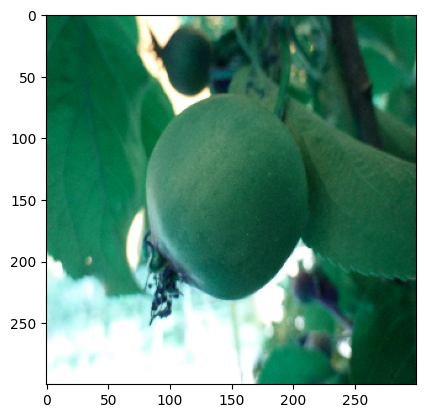

In [21]:
id = 3
plt.imshow(x[id])
prediction = model.predict(x)
k = np.argmax(prediction[id])
if k == 0:
  print("The apple got Scab disease")
elif  k==1:
  print("The apple is healthy")